# Team number: 25
# Team name: Interface Squad
## Team Members: Dariel Carrion, Raul Rosado, Ravi Krishnamurthy, Robert Afnani  

<span style="color:blue; font-size:2em;"> **SETUP** </span>

[You can remove this text from the final report. This is just to help you set up correctly.] 

Some tips for using jupyter notebook:
1. Check whether you are in code or markdown mode in each cell of the report. You can switch between them by clicking on the dropdown.
2. To plot figures, use plot_data() defined below. If you need to insert an image using markdown, you can use this code: `![title](image_folder/image_name.png)`
3. You should not have to edit the python files in the github repository for any of the tasks below. We have shared them just in case though.

In [1]:
# this function creates all in-line plots. DO NOT DELETE.
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt


def plot_data(data):
    # adjust rcParams as needed to make your graph readable
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.title('X,Y,Z Plot')
    plt.plot([row[0] for row in data],[row[1] for row in data], label="x")
    plt.plot([row[0] for row in data],[row[2] for row in data], label="y")
    plt.plot([row[0] for row in data],[row[3] for row in data], label="z")
    plt.legend(loc='upper right')
    plt.show()

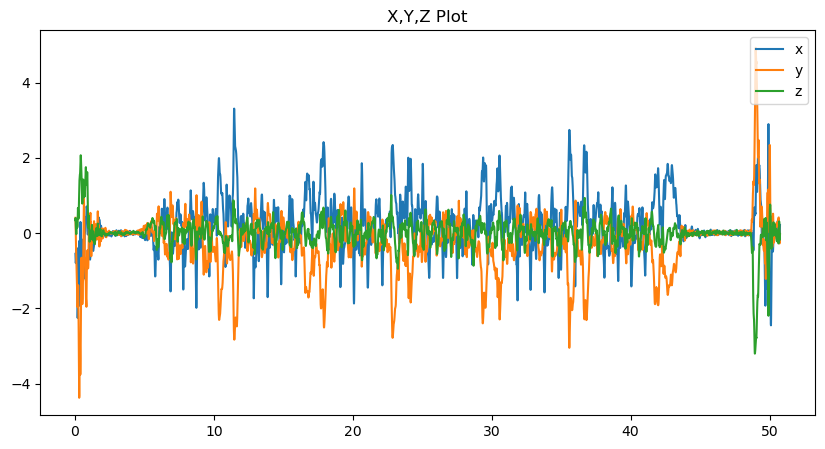

In [2]:
# this file is test.py
import parser_data
# numpy imported to check if the student has numpy
import numpy


data = parser_data.get_data("climb_steps.csv")
plot_data(data)

<span style="color:blue; font-size:2em;"> **TASK 1** </span>

### INSTRUCTIONS

**In your report** <br>

Calculate: <br> 
**a. [3 points]** Open walking_steps.csv collected and check relative_time column. What is the sampling rate for the accelerometer data?

Reflect: <br>
**b. [3 points]** Is the sampling rate stable for the file walking_steps.csv? What is the variation? If it is not stable, explain what could be affecting the stability of the rate? (Hint: https://pure.au.dk/ws/files/93103132/sen099_stisenAT3.pdf, no need to thoroughly read the whole paper, this is just to lead you to think in the right direction. Looking at the first two pages should be sufficient) <br> 
**c. [3 points]** How does your understanding from part (a) affect your data processing pipeline? <br>
**d. [3 points]** How can we make the data easier to work with (hint: [re-sampling the data](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html) )? Choose one method of your choice and briefly explain how the math works. <br> 
**e. [3 points]** Do you think the current  sampling rate is a good basis for capturing human movements like walking?  Explain your reasons for or against your case.  <br> 

<span style="color:blue; font-size:2em;"> **TASK 2** </span>

### INSTRUCTIONS

**In your report** <br>
**a. [5 points]** Plot X, Y, Z  for walking_steps.csv and walking_steps_clean.csv <br>
**b. [5 points]** Plot X, Y, Z  for walking_steps2.csv and walking_steps_clean2.csv <br>
**c. [5 points]** Reflect on the movements in each axis, X, Y, Z of walking_steps_clean.csv. Give details as to how you collected the data and it resulted in movement in each axis.  <br>

**Code and Data files** <br>
In folder /data - Add walking_steps_clean.csv<br>
task2.py - Modify code clean_data below

**Note : Make sure you add/modify code below or your task 2 will not be graded.**  

Cleaning the data...
Cleaned data saved to data/walking_steps_1_clean.csv
Plotting original data for walking_steps_1.csv


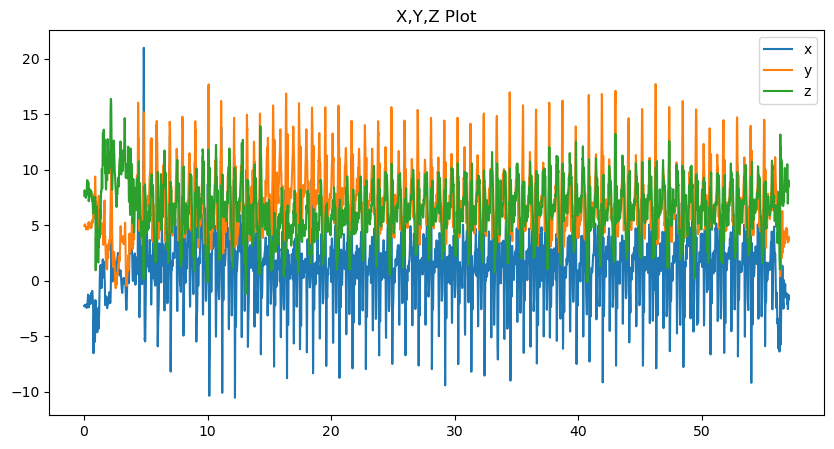

Plotting cleaned data for walking_steps_1_clean.csv


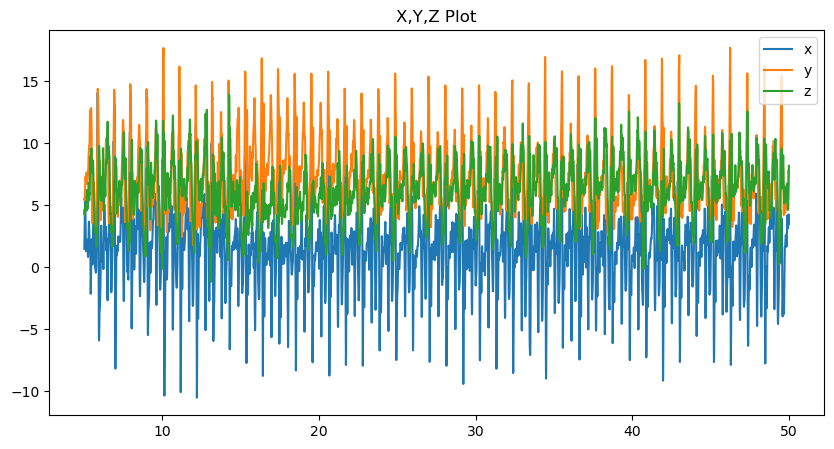

Cleaning the data...
Cleaned data saved to data/walking_steps_2_clean.csv
Plotting original data for walking_steps_2.csv


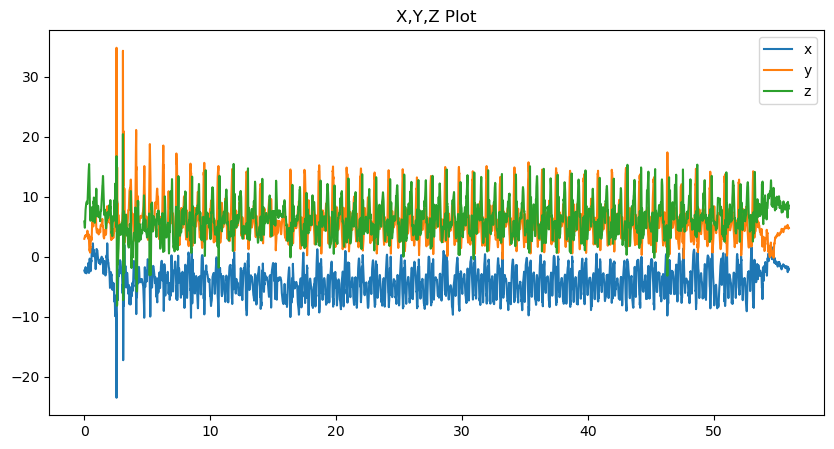

Plotting cleaned data for walking_steps_2_clean.csv


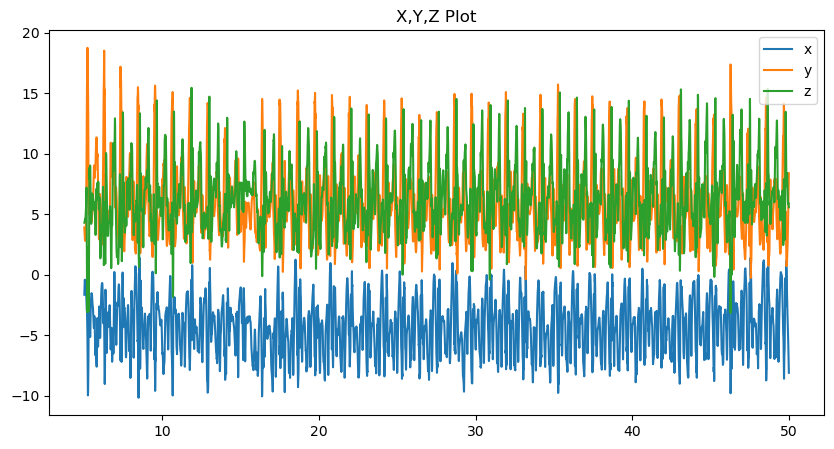

In [3]:
# this is task2.py
import parser_data
import pandas as pd
import os


def clean_data(data, num=None):
    # try 1 -------------------------
    # print ("Write code to remove garbage data")


    # print ("Create new file without garbage data and save it in data folder")
    # file_name_clean = "walking_steps_clean.csv"
    # if num is not None:
    #     file_name_clean = f"data/walking_steps_{num}_clean.csv" 
    #     with open(file_name_clean, "w") as f:
    #         f.write("time,X,Y,Z\n")
    #         # write your cleaned data to the file

    print("Cleaning the data...")

    if isinstance(data, list):
        columns = ['Time (s)', 'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']
        data = pd.DataFrame(data, columns=columns)

    # we inspected the plot and determined that time < 5s and time > 50s is garbage
    start_threshold = 5.0  # Start threshold in seconds 
    end_threshold = 50.0  # End threshold in seconds 
    
    # Filter the data to remove garbage time intervals
    data_cleaned = data[(data['Time (s)'] > start_threshold) & (data['Time (s)'] < end_threshold)]

    # Debug: Print information about the removed data
    # print(f"Removed data outside the range {start_threshold}s to {end_threshold}s")

    # Create the file name for saving
    file_name_clean = "walking_steps_clean.csv"
    if num is not None:
        file_name_clean = f"data/walking_steps_{num}_clean.csv"
    
    # Ensure the directory exists
    os.makedirs("data", exist_ok=True)

    # Save cleaned data to the file
    data_cleaned.to_csv(file_name_clean, index=False)

    print(f"Cleaned data saved to {file_name_clean}")

def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}.csv" # Change to your file name 
        data = parser_data.get_data(file_name) #data -- time,X,Y,Z 
        clean_data(data, i)
        newdata = parser_data.get_data(f"walking_steps_{i}_clean.csv")
        
        # Plot original and clean data
        print(f"Plotting original data for walking_steps_{i}.csv")
        plot_data(data)
        
        # Plot cleaned data
        print(f"Plotting cleaned data for walking_steps_{i}_clean.csv")
        plot_data(newdata)


if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 3** </span>

### INSTRUCTIONS

**In your report** <br>

**a. [6 points - 2 for each plot and 2 for reflection]**  <br>
Add the plot for magnitude for walking_steps_1_clean.csv and walking_steps_2_clean.csv.  <br>

1. Reflect how magnitude is different from X,Y,Z. 
2. How are the magnitudes different in the 2 files? (hint: orientation)<br>

**b. [6 points - 2 for each plot and 2 for reflection]**  <br>
Add the plot for moving average for for walking_steps_1_clean.csv and walking_steps_2_clean.csv using the method you implemented. 

1. How the moving average is different from magnitude.  <br>
2. On what factor(s) does moving average dependent? 

**c. [8 points]** Describe your step counting process.  <br>

**d. [10 points - 5 each]** Run walking_steps_clean.csv through your algorithm. How many steps did you count? Plot your raw data with steps labeled on it  <br>
1. walking_steps_1_clean.csv through your algorithm. 
2. walking_steps_2_clean.csv through your algorithm. 


**e. [10 points]** Reflect on how your calculations are different from ground truth data (100 steps).   <br>

**Code**  <br>
1. **util.py** - modify to implement functions vector_magnitude, moving_average below <br>
2. **task3.py**  - implement count_steps below <br>

**Note : Make sure you add/modify code below or your task 3 will not be graded.**  

In [4]:
# this is util.py
from scipy.signal import butter, lfilter
import numpy as np


def vector_magnitude(data):
    """ function to calculate the magnitude of a vector

    Calculate the magnitude of the vector superposition of data (for
    example, acceleration) on x, y, and z axis

    Arguments:
        data: array of (x, y, z) tuples for a vector

    Returns:
        array of the magnitude of a vector

    """
    # raise NotImplementedError
    data = np.array(data)
    magnitude = np.sqrt(data[:, 0]**2 + data[:, 1]**2 + data[:, 2]**2)
    
    return magnitude


def moving_average(data, window_size):
    """ moving average filter

    Implement a simple moving average filter to use as a low pass
    filter

    Arguments:
        data: data be filtered
        window_size: window_size chosen for the data

    Returns:
        The filtered data.

    TODO:
        Finish this function. Think about how you want to handle
        the size difference between your input array and output array.
        You can write it yourself or consider using numpy.convole for
        it:
        https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """
    # raise NotImplementedError
    
    data = np.array(data)

    window = np.ones(window_size) / window_size

    filtered_data = np.convolve(data, window, mode='valid') 

    return filtered_data

Accelerometer data graph


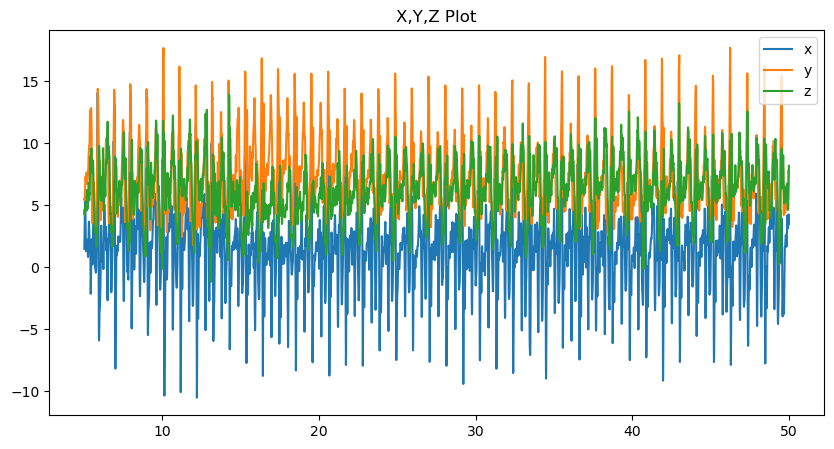

Processing data from walking_steps_1_clean.csv


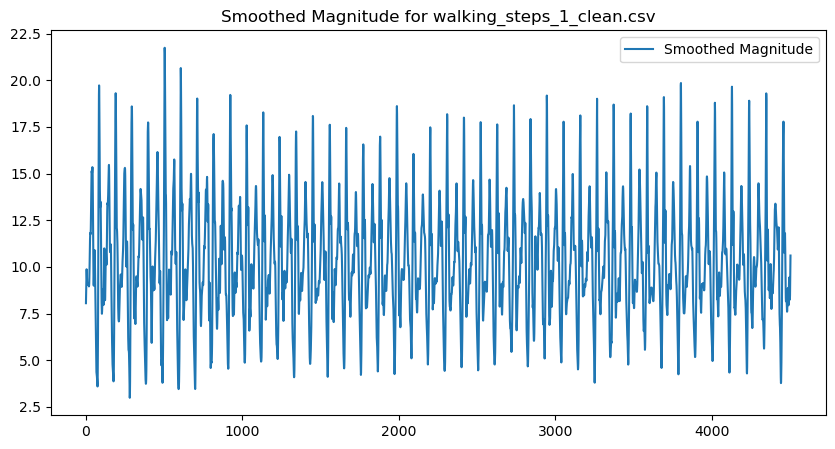

Number of steps counted are : 288
Accelerometer data graph


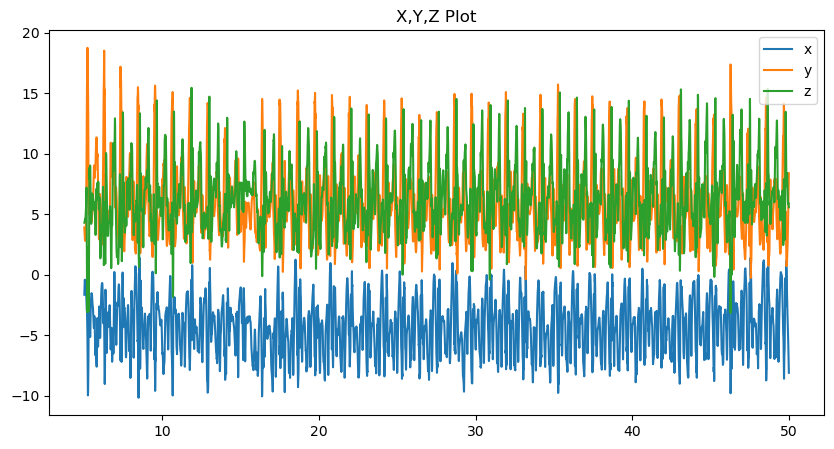

Processing data from walking_steps_2_clean.csv


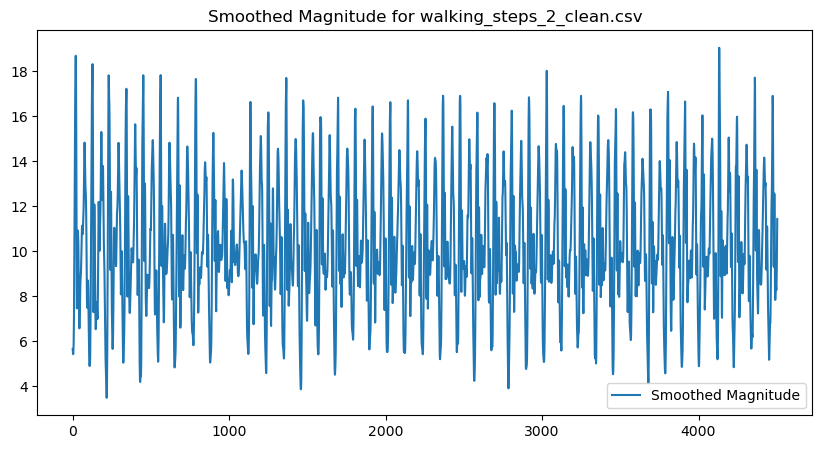

Number of steps counted are : 285


In [5]:
# this is task3.py
# The X-axis might not show significant variation during stair climbing unless there's lateral movement, such as swaying from side to side.
# In such a case, X-axis data might naturally be less relevant for step detection.
import parser_data

def detect_peaks(data, threshold=1.0): # added a new function
    """ Function to count peaks (steps) in the filtered data.

    Args:
        data: Array of magnitudes
        threshold: Value above which a peak is considered a step
    
    Returns:
        The number of steps (peaks) detected
    """
    num_steps = 0
    for i in range(1, len(data)-1):
        # Detect peaks: a peak is when a value is greater than its neighbors and above the threshold
        if data[i-1] < data[i] and data[i] > data[i+1] and data[i] > threshold:
            num_steps += 1
    return num_steps

def count_steps(data,i):
    print("Accelerometer data graph")
    plot_data(data)
    num_steps = 0
    '''
    ADD YOUR CODE HERE. This function counts the number of steps in data and returns the number of steps
    '''

    print(f"Processing data from walking_steps_{i}_clean.csv")

    # Extract X, Y, Z acceleration values and calculate magnitude
    accelerometer_data = np.array([row[1:4] for row in data])  # Assuming time is the first column and X,Y,Z are next
    magnitude_data = vector_magnitude(accelerometer_data)

    # Apply moving average for smoothing
    window_size = 5  # Adjust window size as needed
    smoothed_magnitude = moving_average(magnitude_data, window_size)

    # Plot the smoothed magnitude data
    plt.figure(figsize=(10, 5))
    plt.plot(smoothed_magnitude, label='Smoothed Magnitude')
    plt.title(f'Smoothed Magnitude for walking_steps_{i}_clean.csv')
    plt.legend()
    plt.show()
    # plot_data(smoothed_magnitude)

    # Detect peaks in the smoothed magnitude (which correspond to steps)
    threshold = 1.0  # Adjust based on your data
    num_steps = detect_peaks(smoothed_magnitude, threshold)

    return num_steps

    
    # return num_steps


def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}_clean.csv" 
        data = parser_data.get_data(file_name)
        number_of_steps = count_steps(data, i)
        print("Number of steps counted are : {0:d}".format(number_of_steps))

if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 4** </span>

### INSTRUCTIONS
**In your report** <br>
a. **[10 points]** Explain your algorithm for segmentation, with rationale.  <br>
b. **[5 points]** Plot of pre-segmented data.  Plot segmented data for climbing and walking. Make sure the way you plot (colors/ boxes/lines) easily differentiates the two. <br>
c. **[5 points]** What was the difference in the step counting method from task 3? <br>
d. **[5 points]** How many steps of stairs did you count? Plot labeled data for climbed steps. <br>
e. **[5 points]** Reflect on this exercise and compare it with what you learned in class. (hint: bulling’s activity recognition chain) <br>


**Code and Data files** <br>
In folder /data - Add climbing_steps.csv <br>
Task4.py - modify segment_climbing_walking, count_steps below <br>

**Note: Make sure you add/modify code below or your task 4 will not be graded.**

segment_climbing_walking


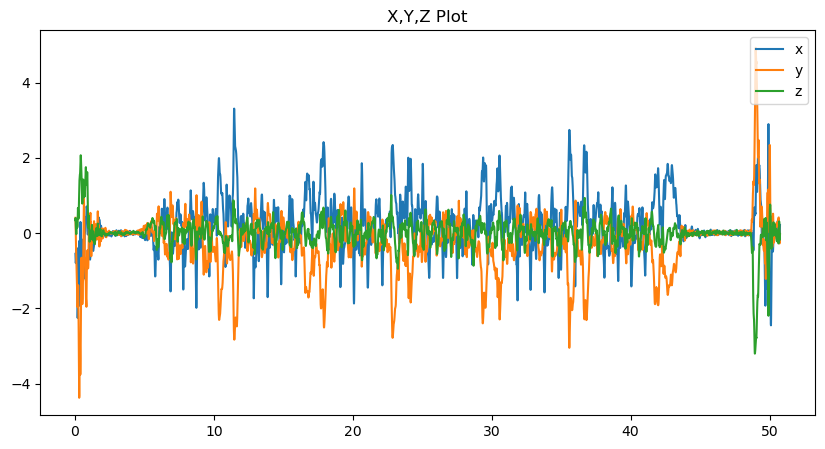

Segmenting climbing vs walking data


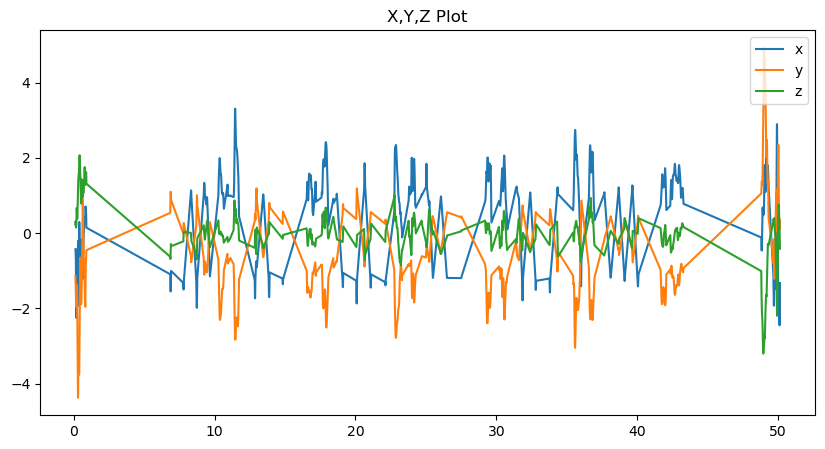

count_steps
Counting steps
Number of steps counted are :91


In [6]:
# this is task4.py

import parser_data

def vector_magnitude(data): # new function
    """Helper function to calculate the magnitude of a vector from (x, y, z) data."""
    data = np.array(data)
    return np.sqrt(data[:, 1]**2 + data[:, 2]**2 + data[:, 3]**2)  # magnitude = sqrt(x^2 + y^2 + z^2)

def segment_climbing_walking(data):
    '''
    While collecting data on stairs there were times when you were also walking rather than climbing
    It is important to remove the parts from the data where you were walking in between the flight of stairs
    Write your own algorithm to find segments in data which corresponds to climbing only

    This functions returns
    List of tuples (x,y,z) which corresponds to climbing only.
    i.e. remove data points from the original data which corresponds to walking
    '''

    print ('segment_climbing_walking')
    plot_data(data)

    # return data
    print('Segmenting climbing vs walking data')

    # Calculate the magnitude of acceleration vector
    magnitude = vector_magnitude(data)

    # Segment based on threshold: Climbing should have more vertical movement and larger magnitude.
    # The threshold can be adjusted depending on your data
    climbing_threshold = 1.2  # Experiment with this value for better segmentation
    
    climbing_data = []
    for i in range(len(magnitude)):
        if magnitude[i] > climbing_threshold:  # We assume larger magnitude means climbing
            climbing_data.append(data[i])  # Keep the data if it's classified as climbing

    # Convert back to numpy array to return
    climbing_data = np.array(climbing_data)

    # Plot segmented data for visualization
    plot_data(climbing_data)

    return climbing_data


def count_steps(data):
    print ('count_steps')
    num_steps = 0
    '''
    This function counts the number of steps in data and returns the number of steps
    '''
    print('Counting steps')

    # Calculate the magnitude of the acceleration vector
    magnitude = vector_magnitude(data)
    
    # Define a threshold for peak detection (representing steps)
    step_threshold = 1.0  # Adjust based on data characteristics
    
    # Detect and count peaks in the magnitude (which correspond to steps)
    num_steps = detect_peaks(magnitude, step_threshold)

    return num_steps


def main():
    # Get data
    file_name = "climb_steps.csv"  # Change this to your data file name
    data = parser_data.get_data(file_name)
    
    segmented_data = segment_climbing_walking(data)
    number_of_steps = count_steps(segmented_data)
    print ("Number of steps counted are :{0:d}".format(number_of_steps))


if __name__== "__main__":
    main()
    

<span style="color:blue; font-size:2em;"> **BONUS: TASK 5** </span>

### INSTRUCTIONS
**In your report** <br>
**[5 points]** Match the dataset to the TA! Write the name of the dataset as provided to you next to the TA’s name. <br>

**[5 points]** Explain your process and methods - how did you go about solving this problem? ATTACH your source-code Python file (task5.py).


**Code and Data files** <br>
In folder /data - Download and unzip the data from Canvas <br>
Task5.py - Modify source-code task5.py below.

**Note: Make sure you add/modify code below or your task 5 will not be graded.**

In [7]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from scipy.fft import fft
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

def extract_features(window):
    features = []
    axes = ['x', 'y', 'z']
    for axis in axes:
        data = window[axis].values
        # Time-domain features
        features.extend([
            np.mean(data),
            np.std(data),
            np.var(data),
            skew(data),
            kurtosis(data),
            np.sqrt(np.mean(data**2)),  # RMS
            np.sum(np.abs(data)) / len(data),  # SMA
            np.sum(data**2) / len(data)  # Energy
        ])
        # Peak counts
        peaks, _ = find_peaks(data)
        features.append(len(peaks))
        # Frequency-domain features
        freq_data = np.abs(fft(data))
        freq_data = freq_data[:len(freq_data)//2]  # Take the positive frequencies
        features.extend([
            np.argmax(freq_data[1:]) + 1,  # Dominant frequency index
            -np.sum((freq_data / np.sum(freq_data)) * np.log2(freq_data / np.sum(freq_data) + 1e-6))  # Spectral entropy
        ])
    # Magnitude vector
    mag = np.sqrt(window['x']**2 + window['y']**2 + window['z']**2)
    features.extend([
        np.mean(mag),
        np.std(mag),
        np.var(mag),
        skew(mag),
        kurtosis(mag)
    ])
    return features

def load_data(folder_path, label):
    data = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            # Rename columns to match the expected names
            df.rename(columns={
                'Acceleration x (m/s^2)': 'x',
                'Acceleration y (m/s^2)': 'y',
                'Acceleration z (m/s^2)': 'z'
            }, inplace=True)
            # Optionally drop unnecessary columns
            # df = df[['x', 'y', 'z']]  # Keep only the required columns
            # Segment data
            window_size = 50
            overlap = 25
            for start in range(0, len(df) - window_size, overlap):
                window = df.iloc[start:start+window_size]
                features = extract_features(window)
                data.append(features)
                labels.append(label)
    return data, labels

# Set the base directory where your data is located
base_dir = 'task5_combined_data'  # Update this path if necessary

# Prepare training data
train_data = []
train_labels = []
for i, ta in enumerate(['TA 1', 'TA 2', 'TA 3'], start=1):
    folder = os.path.join(base_dir, 'train', ta)
    data, labels = load_data(folder, label=i)
    train_data.extend(data)
    train_labels.extend(labels)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(clf, train_data, train_labels, cv=5)
print(f'Cross-validation accuracy: {np.mean(scores):.2f}')

# Fit the model on the entire training data
clf.fit(train_data, train_labels)

# Load and predict test data
test_results = {}
test_folder = os.path.join(base_dir, 'test')
for filename in os.listdir(test_folder):
    if filename.startswith('test_window'):
        file_path = os.path.join(test_folder, filename)
        df = pd.read_csv(file_path)
        # Rename columns to match the expected names
        df.rename(columns={
            'Acceleration x (m/s^2)': 'x',
            'Acceleration y (m/s^2)': 'y',
            'Acceleration z (m/s^2)': 'z'
        }, inplace=True)
        # Optionally drop unnecessary columns
        # df = df[['x', 'y', 'z']]  # Keep only the required columns
        features = []
        window_size = 50
        overlap = 25
        for start in range(0, len(df) - window_size, overlap):
            window = df.iloc[start:start+window_size]
            feat = extract_features(window)
            features.append(feat)
        # Predict and take the majority vote
        preds = clf.predict(features)
        pred_label = np.bincount(preds).argmax()
        test_results[filename] = f'TA {pred_label}'

# Output the results in order
for session in sorted(test_results.keys(), key=lambda x: int(x.replace('test_window', '').replace('.csv', ''))):
    ta = test_results[session]
    print(f'{session}: {ta}')


Cross-validation accuracy: 0.99
test_window1.csv: TA 1
test_window2.csv: TA 3
test_window3.csv: TA 3
test_window4.csv: TA 2
test_window5.csv: TA 1
test_window6.csv: TA 2
test_window7.csv: TA 3
test_window8.csv: TA 1
test_window9.csv: TA 2
